In [3]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!python optimize.py

In [8]:
numAgents = 100
numIterations = 3

effs = []
fakes = []

for i in range(numIterations):
    output = uproot.open('output/output'+str(i)+'.root')
    totalSim = np.zeros(numAgents)
    totalRec = np.zeros(numAgents)
    totalAss = np.zeros(numAgents)
    for j in range(numAgents):
        out = output['simpleValidation' + str(j)]['output']
        totalRec[j] = out['rt'].array()[0]
        totalAss[j] = out['at'].array()[0]
        totalSim[j] = out['st'].array()[0]
        
    # print(totalSim, totalAss, totalRec)
    # print('Efficiency ')
    effs.append(totalAss / totalSim)
    # print('Fake rate ')
    fakes.append((totalRec - totalAss) / totalRec)
    output.close()

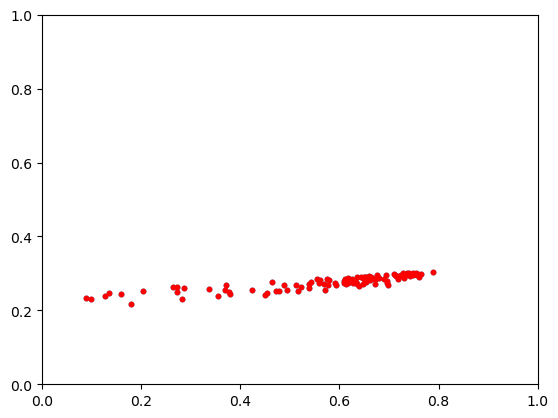

In [10]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    s=ax.scatter(fakes[0], effs[0], s=10)
    s=ax.scatter(fakes[i], effs[i], c="red",s=10)

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(numIterations))
ani.save('gifs/output.gif', writer='pillow')


In [39]:
import csv

In [48]:
p1s=[]
p2s=[]
p3s=[]
p4s=[]
for i in range(numIterations):
    p1 = []
    p2 = []
    p3 = []
    p4 = []
    with open("params/parameters"+str(i)+".csv", "r") as f:
        reader = csv.reader(f)
        for row in reader:
            p1.append(float(row[0]))
            p2.append(float(row[1]))
            p3.append(float(row[2]))
            p4.append(float(row[3]))
    p1s.append(p1)
    p2s.append(p2)
    p3s.append(p3)
    p4s.append(p4)

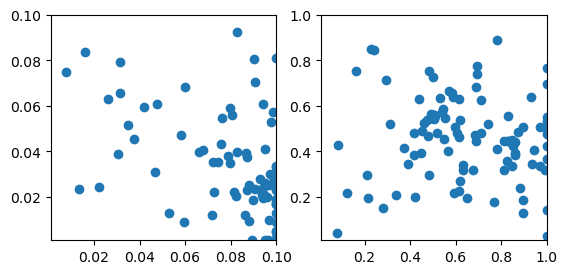

In [58]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(121, aspect='equal')
    ax.set_xlim(0.001,0.1)
    ax.set_ylim(0.001,0.1)
    s=ax.scatter(p1s[i], p2s[i])
    ax = fig.add_subplot(122, aspect='equal')
    ax.set_xlim(0.01,1)
    ax.set_ylim(0.01,1)
    s=ax.scatter(p3s[i], p4s[i])

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(10))
ani.save('gifs/animation.gif', writer='pillow')